# Understanding Options:

___

## Black-Scholes Formula for European Call Option

The Black-Scholes formula calculates the price of a European call option:

$$
C(S, t) = N(d_1)\,S \;-\; N(d_2)\,K\,e^{-r\,(T - t)}
$$

where:

$$
d_1 = \frac{\ln\!\Bigl(\frac{S}{K}\Bigr) \;+\; \Bigl(r + \frac{\sigma^2}{2}\Bigr)\,(T - t)}
{\sigma\,\sqrt{T - t}}
$$

$$
d_2 = d_1 \;-\; \sigma\,\sqrt{T - t}
$$


**Symbol Definitions:**
- \( C(S, t) \): Call option price at time \( t \)
- \( S \): Current stock price
- \( K \): Strike price of the option
- \( r \): Risk-free interest rate
- \( σ \): Volatility of the stock’s return
- \( T \): Time to option maturity
- \( N(x) \): Cumulative distribution function of the standard normal distribution

---

## Black-Scholes Formula for European Put Option

The Black-Scholes formula calculates the price of a European put option:

$$
P(S, t) = N(-d_2)\,K\,e^{-r\,(T - t)} - N(-d_1)\,S
$$

where:

$$
d_1 = \frac{\ln\!\Bigl(\frac{S}{K}\Bigr) \;+\; \Bigl(r + \frac{\sigma^2}{2}\Bigr)\,(T - t)}
{\sigma\,\sqrt{T - t}}
$$

$$
d_2 = d_1 \;-\; \sigma\,\sqrt{T - t}
$$

**Symbol Definitions:**
- \( P(S, t) \): Put option price at time \( t \)
- \( S \): Current stock price
- \( K \): Strike price of the option
- \( r \): Risk-free interest rate
- \( σ \): Volatility of the stock’s return
- \( T \): Time to option maturity
- \( N(x) \): Cumulative distribution function of the standard normal distribution


---

## 1. Delta (Δ)

**Definition:** Measures the rate of change of the option price with respect to changes in the underlying asset's price.

**Formula:**
$$
\Delta = \frac{\partial C}{\partial S} = N(d_1)
$$

**Interpretation:** 
- For a call option, Delta ranges between 0 and 1.
- A Delta of 0.6 implies that for every \$1 increase in the underlying stock price \( S \), the option price \( C \) increases by \$0.60.

---

## 2. Gamma (Γ)

**Definition:** Measures the rate of change of Delta with respect to changes in the underlying asset's price. It indicates the curvature of the option price relative to \( S \).

**Formula:**
$$
\Gamma = \frac{\partial^2 C}{\partial S^2} = \frac{N'(d_1)}{S \sigma \sqrt{T - t}} = \frac{e^{-d_1^2 / 2}}{S \sigma \sqrt{2\pi} \sqrt{T - t}}
$$

**Interpretation:**
- Gamma is always positive for both call and put options.
- A higher Gamma indicates that Delta is more sensitive to changes in \( S \), which is common for at-the-money options.

---

## 3. Theta (Θ)

**Definition:** Measures the sensitivity of the option price to the passage of time, often referred to as the "time decay" of the option.

**Formula:**
$$
\Theta = \frac{\partial C}{\partial t} = -\frac{S N'(d_1) \sigma}{2 \sqrt{T - t}} - r K e^{-r(T - t)} N(d_2)
$$

**Interpretation:**
- Theta is typically negative for long call options, indicating that the option's value decreases as time progresses, all else being equal.
- Represents the amount by which the option's price will decrease each day.

---

## 4. Vega (ν)

**Definition:** Measures the sensitivity of the option price to changes in the volatility \( \sigma \) of the underlying asset.

**Formula:**
$$
\text{Vega} = \frac{\partial C}{\partial \sigma} = S N'(d_1) \sqrt{T - t}
$$

**Interpretation:**
- Vega is positive for both call and put options.
- Indicates how much the option price will change with a 1% change in volatility.
- Higher Vega implies that the option is more sensitive to changes in volatility.

---

## 5. Rho (ρ)

**Definition:** Measures the sensitivity of the option price to changes in the risk-free interest rate \( r \).

**Formula:**
$$
\rho = \frac{\partial C}{\partial r} = K (T - t) e^{-r(T - t)} N(d_2)
$$

**Interpretation:**
- For call options, Rho is positive, meaning that an increase in \( r \) will increase the option price.
- Indicates the change in the option's price for a 1% change in the risk-free rate.

### Code Explanation

#### 1. **Setup and Libraries**
```python
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [100]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

# **Visualizing the Payoff of a Call Option for Different Strike Prices**

This example demonstrates how to visualize the **payoff of a call option** using a 3D surface plot in Python. A call option provides the holder the right, but not the obligation, to buy an underlying asset at a specified strike price (K). The payoff of a call option is given by the formula:

$$
\text{Payoff} = \max(S - K, 0)
$$

Where:
- \(S\) is the **underlying price**.
- \(K\) is the **strike price**.

Below, we use NumPy and Matplotlib to create a 3D plot to explore how the payoff varies with different combinations of \(S\) and \(K\).



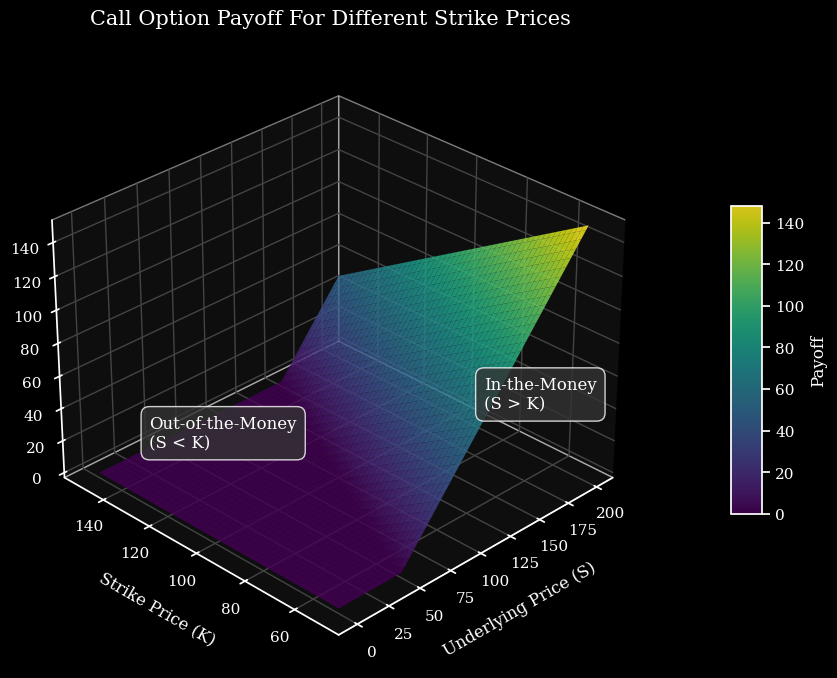

In [101]:
plt.style.use('dark_background')


S = np.linspace(0, 200, 100)    
K = np.linspace(50, 150, 100)   


S_grid, K_grid = np.meshgrid(S, K)


payoff = np.maximum(S_grid - K_grid, 0)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


ax.xaxis.pane.set_facecolor('#1C1C1E')
ax.yaxis.pane.set_facecolor('#1C1C1E')
ax.zaxis.pane.set_facecolor('#1C1C1E')


ax.xaxis._axinfo["grid"]['color'] = "#444444"
ax.yaxis._axinfo["grid"]['color'] = "#444444"
ax.zaxis._axinfo["grid"]['color'] = "#444444"


surface = ax.plot_surface(S_grid, K_grid, payoff,
                          cmap='viridis', edgecolor='none', alpha=0.85)


ax.set_title('Call Option Payoff For Different Strike Prices', 
             fontsize=15, pad=20, color='white')
ax.set_xlabel('Underlying Price (S)', fontsize=12, labelpad=10, color='white')
ax.set_ylabel('Strike Price (K)', fontsize=12, labelpad=10, color='white')
ax.set_zlabel('Payoff', fontsize=12, labelpad=10, color='white')


cbar = fig.colorbar(surface, shrink=0.5, aspect=10, pad=0.1)
cbar.set_label('Payoff', color='white')

cbar.ax.yaxis.set_tick_params(color='white')
for label in cbar.ax.get_yticklabels():
    label.set_color('white')


ax.view_init(elev=30, azim=225)

ax.text(40, 150, 0,
        "Out-of-the-Money\n(S < K)",
        color='white',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#333333', alpha=0.8))

ax.text(160, 70, 40,
        "In-the-Money\n(S > K)",
        color='white',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#333333', alpha=0.8))

plt.show()


# **Visualizing the Payoff of a Put Option for Different Strike Prices**

This example demonstrates how to visualize the **payoff of a put option** using a 3D surface plot in Python. A put option provides the holder the right, but not the obligation, to sell an underlying asset at a specified strike price (\(K\)). The payoff of a put option is given by the formula:

$$
\text{Payoff} = \max(K - S, 0)
$$

Where:
- \(S\) is the **underlying price**.
- \(K\) is the **strike price**.


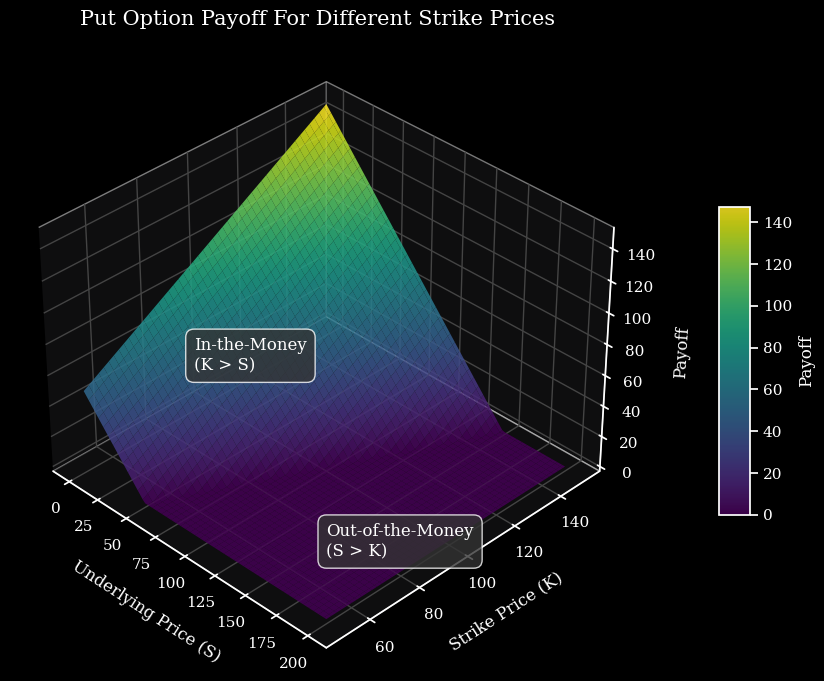

In [102]:
plt.style.use('dark_background')


S = np.linspace(0, 200, 100)
K = np.linspace(50, 150, 100)

S_grid, K_grid = np.meshgrid(S, K)

payoff = np.maximum(K_grid - S_grid, 0)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.xaxis.pane.set_facecolor('#1C1C1E')
ax.yaxis.pane.set_facecolor('#1C1C1E')
ax.zaxis.pane.set_facecolor('#1C1C1E')

ax.xaxis._axinfo["grid"]['color'] = "#444444"
ax.yaxis._axinfo["grid"]['color'] = "#444444"
ax.zaxis._axinfo["grid"]['color'] = "#444444"

surface = ax.plot_surface(S_grid, K_grid, payoff,
                          cmap='viridis', edgecolor='none', alpha=0.85)

ax.set_title('Put Option Payoff For Different Strike Prices',
             fontsize=15, pad=20, color='white')
ax.set_xlabel('Underlying Price (S)', fontsize=12, labelpad=10, color='white')
ax.set_ylabel('Strike Price (K)', fontsize=12, labelpad=10, color='white')
ax.set_zlabel('Payoff', fontsize=12, labelpad=10, color='white')

cbar = fig.colorbar(surface, shrink=0.5, aspect=10, pad=0.1)
cbar.set_label('Payoff', color='white')
cbar.ax.yaxis.set_tick_params(color='white')
for label in cbar.ax.get_yticklabels():
    label.set_color('white')


ax.view_init(elev=35, azim=-45)

ax.text(30, 80, 50,
        "In-the-Money\n(K > S)",
        color='white',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#333333', alpha=0.8))

ax.text(160, 70, 0,
        "Out-of-the-Money\n(S > K)",
        color='white',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#333333', alpha=0.8))

plt.show()


# **Visualizing the Payoff of a Short Call Option for Different Strike Prices**

This example demonstrates how to visualize the **payoff of a short call option** using a 3D surface plot in Python. A short call option refers to a strategy where the trader sells a call option. The payoff for a short call is the inverse of the long call payoff, and it is given by:

$$
\text{Payoff} = -\max(S - K, 0)
$$

Where:
- \(S\) is the **underlying price**.
- \(K\) is the **strike price**.

A short call has **limited profit** (the premium received) and **unlimited loss** if the underlying price \(S\) exceeds the strike price \(K\).


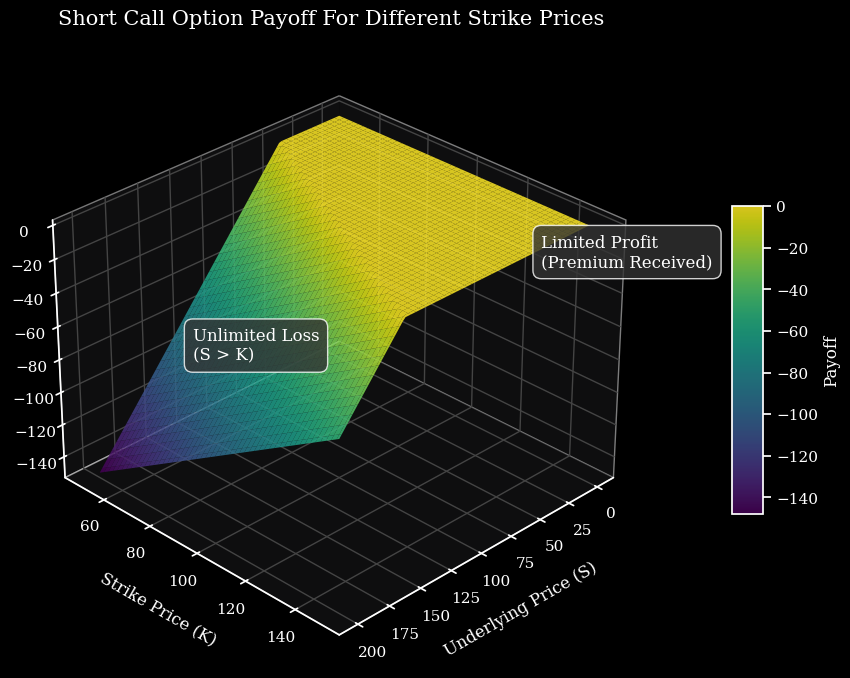

In [103]:
plt.style.use('dark_background')


S = np.linspace(0, 200, 100)    
K = np.linspace(50, 150, 100)   


S_grid, K_grid = np.meshgrid(S, K)


payoff = -np.maximum(S_grid - K_grid, 0)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


ax.xaxis.pane.set_facecolor('#1C1C1E')
ax.yaxis.pane.set_facecolor('#1C1C1E')
ax.zaxis.pane.set_facecolor('#1C1C1E')


ax.xaxis._axinfo["grid"]['color'] = "#444444"
ax.yaxis._axinfo["grid"]['color'] = "#444444"
ax.zaxis._axinfo["grid"]['color'] = "#444444"


surface = ax.plot_surface(S_grid, K_grid, payoff,
                          cmap='viridis', edgecolor='none', alpha=0.85)


ax.set_title('Short Call Option Payoff For Different Strike Prices', 
             fontsize=15, pad=20, color='white')
ax.set_xlabel('Underlying Price (S)', fontsize=12, labelpad=10, color='white')
ax.set_ylabel('Strike Price (K)', fontsize=12, labelpad=10, color='white')
ax.set_zlabel('Payoff', fontsize=12, labelpad=10, color='white')


cbar = fig.colorbar(surface, shrink=0.5, aspect=10, pad=0.1)
cbar.set_label('Payoff', color='white')

cbar.ax.yaxis.set_tick_params(color='white')
for label in cbar.ax.get_yticklabels():
    label.set_color('white')


ax.view_init(elev=30, azim=45)  

ax.text(40, 150, -10,
        "Limited Profit\n(Premium Received)",
        color='white',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#333333', alpha=0.8))

ax.text(160, 70, -80,
        "Unlimited Loss\n(S > K)",
        color='white',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#333333', alpha=0.8))


plt.show()


# **Visualizing the Payoff of a Short Put Option for Different Strike Prices**

This example demonstrates how to visualize the **payoff of a short put option** using a 3D surface plot in Python. A short put option refers to a strategy where the trader sells a put option. The payoff for a short put is the inverse of the long put payoff, and it is given by:

$$
\text{Payoff} = -\max(K - S, 0)
$$

Where:
- \(S\) is the **underlying price**.
- \(K\) is the **strike price**.

A short put has **limited profit** (the premium received) and **unlimited loss** if the underlying price \(S\) falls below the strike price \(K\).

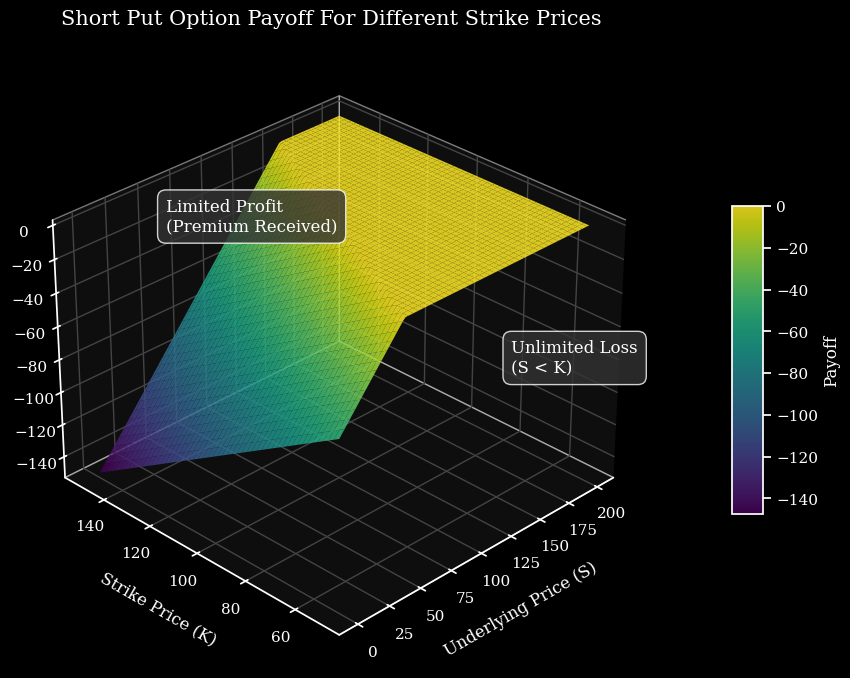

In [104]:
plt.style.use('dark_background')


S = np.linspace(0, 200, 100)    
K = np.linspace(50, 150, 100)   


S_grid, K_grid = np.meshgrid(S, K)


payoff = -np.maximum(K_grid - S_grid, 0)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


ax.xaxis.pane.set_facecolor('#1C1C1E')
ax.yaxis.pane.set_facecolor('#1C1C1E')
ax.zaxis.pane.set_facecolor('#1C1C1E')


ax.xaxis._axinfo["grid"]['color'] = "#444444"
ax.yaxis._axinfo["grid"]['color'] = "#444444"
ax.zaxis._axinfo["grid"]['color'] = "#444444"


surface = ax.plot_surface(S_grid, K_grid, payoff,
                          cmap='viridis', edgecolor='none', alpha=0.85)

ax.set_title('Short Put Option Payoff For Different Strike Prices', 
             fontsize=15, pad=20, color='white')
ax.set_xlabel('Underlying Price (S)', fontsize=12, labelpad=10, color='white')
ax.set_ylabel('Strike Price (K)', fontsize=12, labelpad=10, color='white')
ax.set_zlabel('Payoff', fontsize=12, labelpad=10, color='white')


cbar = fig.colorbar(surface, shrink=0.5, aspect=10, pad=0.1)
cbar.set_label('Payoff', color='white')

cbar.ax.yaxis.set_tick_params(color='white')
for label in cbar.ax.get_yticklabels():
    label.set_color('white')


ax.view_init(elev=30, azim=225)  

ax.text(40, 140, -10,
        "Limited Profit\n(Premium Received)",
        color='white',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#333333', alpha=0.8))

ax.text(160, 60, -80,
        "Unlimited Loss\n(S < K)",
        color='white',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#333333', alpha=0.8))

# 10. Display the plot
plt.show()


## **Futures Payoff Basics**

- **Futures Contract**: A legal agreement to buy or sell an asset at a predetermined price (futures price, \( K \)) at a specified time in the future.

  - **Long Position**: The holder agrees to buy the underlying asset at the futures price (\( K \)).
    - Payoff formula:
      $$
      \text{Payoff}_{\text{long}} = S - K
      $$
      where \( S \) is the underlying asset's price at expiry.

  - **Short Position**: The holder agrees to sell the underlying asset at the futures price (\( K \)).
    - Payoff formula:
      $$
      \text{Payoff}_{\text{short}} = K - S
      $$

- **Key Observations**:
  - When \( S > K \): The long position gains, and the short position loses.
  - When \( S < K \): The short position gains, and the long position loses.


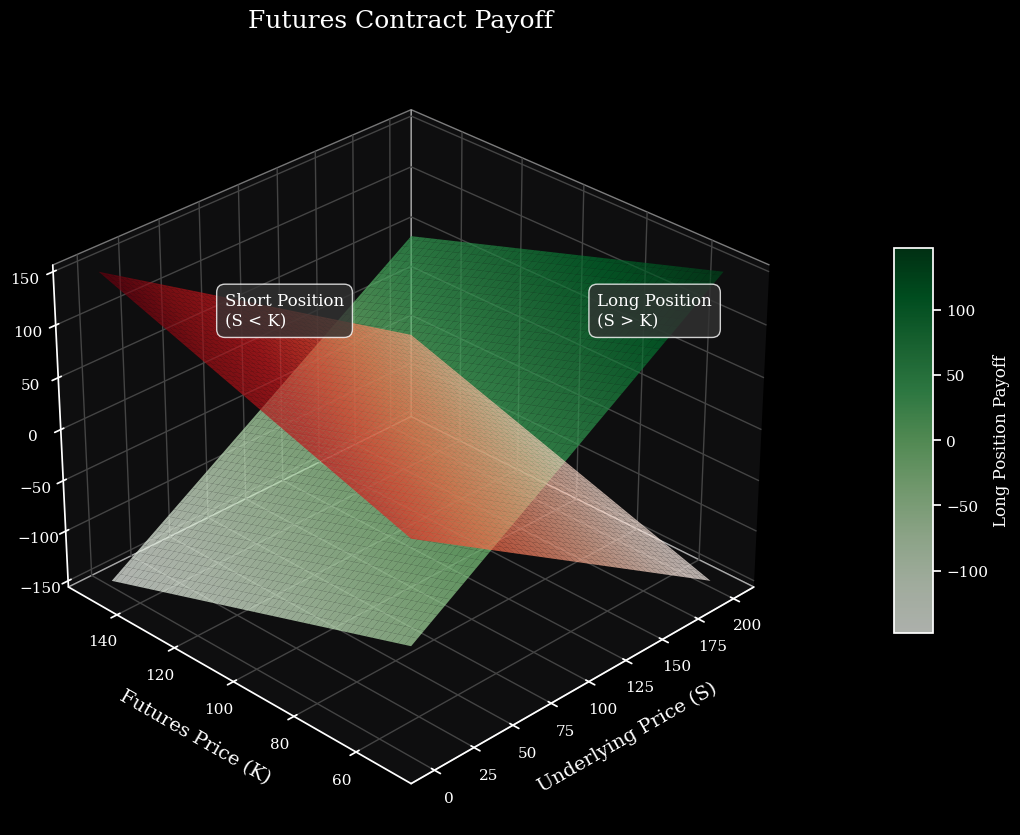

In [105]:
plt.style.use('dark_background')

S = np.linspace(0, 200, 100)    
K = np.linspace(50, 150, 100)   

S_grid, K_grid = np.meshgrid(S, K)

payoff_long = S_grid - K_grid      
payoff_short = K_grid - S_grid     

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')


ax.xaxis.pane.set_facecolor('#1C1C1E')
ax.yaxis.pane.set_facecolor('#1C1C1E')
ax.zaxis.pane.set_facecolor('#1C1C1E')


ax.xaxis._axinfo["grid"]['color'] = "#444444"
ax.yaxis._axinfo["grid"]['color'] = "#444444"
ax.zaxis._axinfo["grid"]['color'] = "#444444"


surface_long = ax.plot_surface(S_grid, K_grid, payoff_long,
                               cmap='Greens', edgecolor='none', alpha=0.7, label='Long Position')

surface_short = ax.plot_surface(S_grid, K_grid, payoff_short,
                                cmap='Reds', edgecolor='none', alpha=0.7, label='Short Position')


ax.set_title('Futures Contract Payoff', fontsize=18, pad=20, color='white')
ax.set_xlabel('Underlying Price (S)', fontsize=14, labelpad=10, color='white')
ax.set_ylabel('Futures Price (K)', fontsize=14, labelpad=10, color='white')
ax.set_zlabel('Payoff', fontsize=14, labelpad=10, color='white')


cbar = fig.colorbar(surface_long, shrink=0.5, aspect=10, pad=0.1)
cbar.set_label('Long Position Payoff', color='white')

cbar.ax.yaxis.set_tick_params(color='white')
for label in cbar.ax.get_yticklabels():
    label.set_color('white')


ax.view_init(elev=30, azim=225)

ax.text(160, 70, 100,
        "Long Position\n(S > K)",
        color='white',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#333333', alpha=0.8))


ax.text(40, 130, 100,
        "Short Position\n(S < K)",
        color='white',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#333333', alpha=0.8))


plt.show()


## **Vertical Spread**

A **vertical spread** is an options strategy involving two options with the same expiration date but different strike prices. The goal is to limit risk and potentially profit from directional movements in the underlying asset price.

### Key Strategies:
- **Bull Call Spread**: A bullish strategy using two call options.
- **Bear Put Spread**: A bearish strategy using two put options.
- **Bull Put Spread**: A bullish strategy using two put options.
- **Bear Call Spread**: A bearish strategy using two call options.

---

## **Payoff Formulas**

- Underlying asset price  
$$ S $$  
- First strike price  
$$ K_{1} $$  
- Second strike price  
$$ K_{2} $$  
- Premium for the first option  
$$ P_{1} $$  
- Premium for the second option  
$$ P_{2} $$    
- `strategy_type`: The type of vertical spread strategy


### Payoff Calculations for Each Strategy

1. **Bull Call Spread**:
   Buying a call option at \( K_1 \) and selling a call option at \( K_2 \).
   $$
   \text{Payoff}_{\text{bull\_call}} = \max(S - K_1, 0) - P_1 - \big(\max(S - K_2, 0) - P_2\big)
   $$

2. **Bear Put Spread**:
   Buying a put option at \( K_1 \) and selling a put option at \( K_2 \).
   $$
   \text{Payoff}_{\text{bear\_put}} = \max(K_1 - S, 0) - P_1 - \big(\max(K_2 - S, 0) - P_2\big)
   $$

3. **Bull Put Spread**:
   Selling a put option at \( K_1 \) and buying a put option at \( K_2 \).
   $$
   \text{Payoff}_{\text{bull\_put}} = \big(P_1 - \max(K_1 - S, 0)\big) - \big(P_2 - \max(K_2 - S, 0)\big)
   $$

4. **Bear Call Spread**:
   Selling a call option at \( K_1 \) and buying a call option at \( K_2 \).
   $$
   \text{Payoff}_{\text{bear\_call}} = \big(P_1 - \max(S - K_1, 0)\big) - \big(P_2 - \max(S - K_2, 0)\big)
   $$


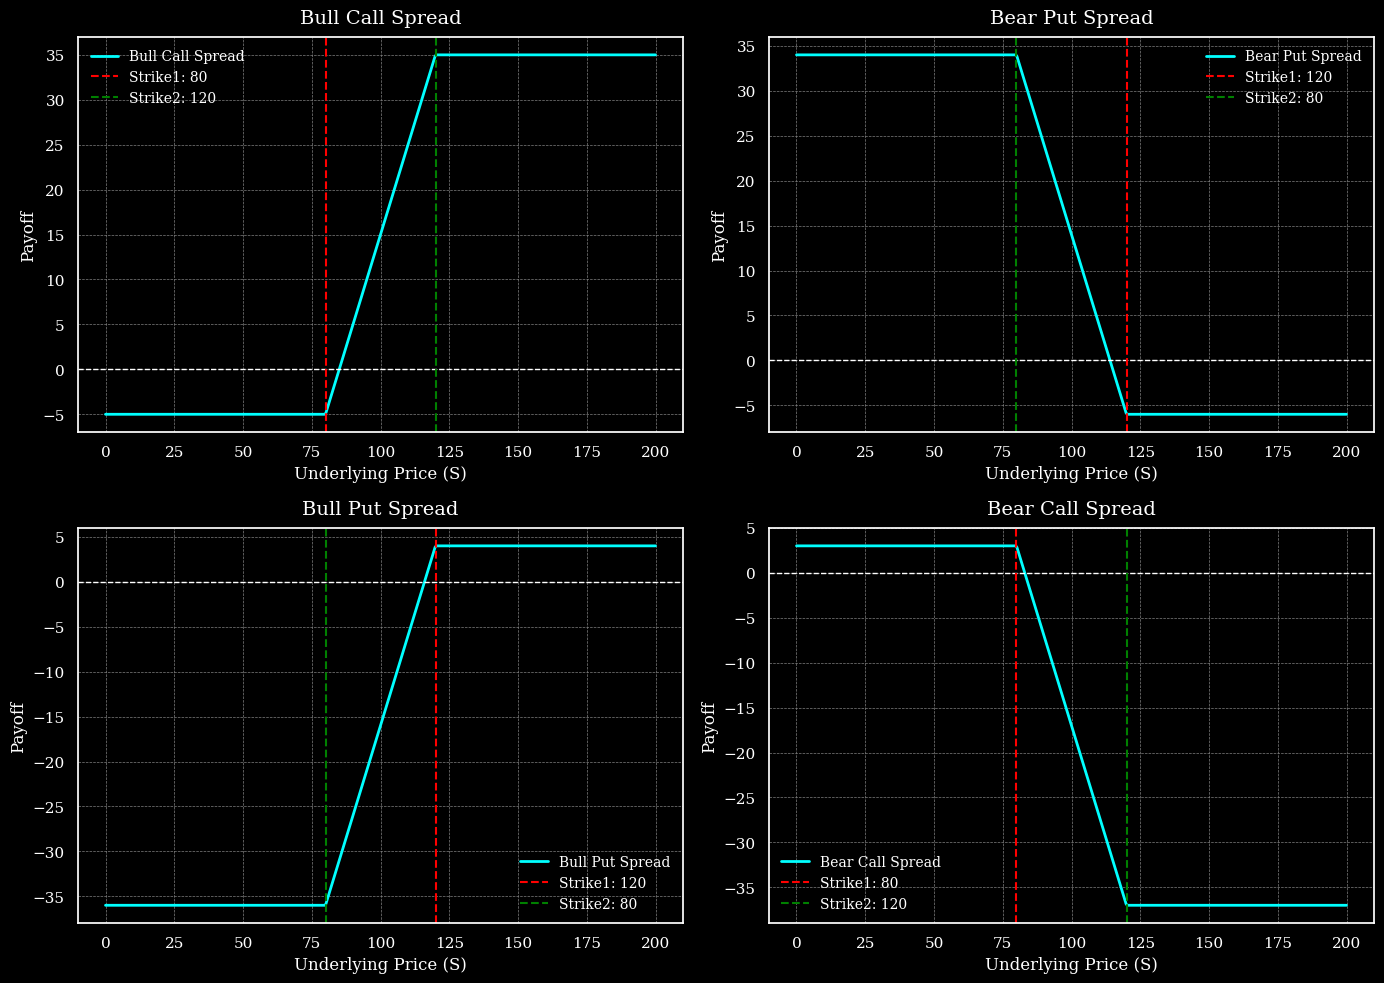

In [106]:
def calculate_payoff(S, strike1, strike2, premium1, premium2, strategy_type):
    """
    Calculate the payoff of a vertical spread.

    S: Underlying asset prices
    strike1: First strike price
    strike2: Second strike price
    premium1: Premium paid/received for the first option
    premium2: Premium paid/received for the second option
    strategy_type: One of ['bull_call', 'bear_put', 'bull_put', 'bear_call']
    """
    if strategy_type == 'bull_call':  
        payoff = np.maximum(S - strike1, 0) - premium1 - (np.maximum(S - strike2, 0) - premium2)
    elif strategy_type == 'bear_put':  
        payoff = np.maximum(strike1 - S, 0) - premium1 - (np.maximum(strike2 - S, 0) - premium2)
    elif strategy_type == 'bull_put':  
        payoff = (premium1 - np.maximum(strike1 - S, 0)) - (premium2 - np.maximum(strike2 - S, 0))
    elif strategy_type == 'bear_call':  
        payoff = (premium1 - np.maximum(S - strike1, 0)) - (premium2 - np.maximum(S - strike2, 0))
    else:
        raise ValueError("Invalid strategy_type. Must be one of ['bull_call', 'bear_put', 'bull_put', 'bear_call']")
    return payoff


S = np.linspace(0, 200, 500)


strategies = [
    {'name': 'Bull Call Spread', 'strike1': 80, 'strike2': 120, 'premium1': 8, 'premium2': 3, 'type': 'bull_call'},
    {'name': 'Bear Put Spread', 'strike1': 120, 'strike2': 80, 'premium1': 10, 'premium2': 4, 'type': 'bear_put'},
    {'name': 'Bull Put Spread', 'strike1': 120, 'strike2': 80, 'premium1': 6, 'premium2': 2, 'type': 'bull_put'},
    {'name': 'Bear Call Spread', 'strike1': 80, 'strike2': 120, 'premium1': 5, 'premium2': 2, 'type': 'bear_call'},
]


plt.style.use('dark_background')
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
ax = ax.flatten()

for i, strategy in enumerate(strategies):
    payoff = calculate_payoff(S, strategy['strike1'], strategy['strike2'], 
                              strategy['premium1'], strategy['premium2'], 
                              strategy['type'])
    ax[i].plot(S, payoff, label=strategy['name'], color='cyan', linewidth=2)
    ax[i].axhline(0, color='white', linestyle='--', linewidth=1)
    ax[i].axvline(strategy['strike1'], color='red', linestyle='--', label=f"Strike1: {strategy['strike1']}")
    ax[i].axvline(strategy['strike2'], color='green', linestyle='--', label=f"Strike2: {strategy['strike2']}")
    ax[i].set_title(strategy['name'], fontsize=14, color='white', pad=10)
    ax[i].set_xlabel('Underlying Price (S)', fontsize=12, color='white')
    ax[i].set_ylabel('Payoff', fontsize=12, color='white')
    ax[i].legend(fontsize=10, loc='best', frameon=False)
    ax[i].grid(color='gray', linestyle='--', linewidth=0.5)


plt.tight_layout()
plt.show()


## **Time Spread Payoff**

A **time spread**, also known as a **horizontal spread**, is an options strategy where the same underlying asset is used with options having identical or varying strike prices, but with **different expiration dates**. The objective of this strategy is to take advantage of the difference in **theta decay** between the short-dated and long-dated options.

### **Key Payoff Characteristics**:
1. **Calendar Spread**: Both options have the **same strike price** but different expiration dates.
2. **Diagonal Spread**: Combines **different strike prices** with different expiration dates.

---

### **Core Functionality**

The code is structured around two primary functions:

1. **`calculate_option_payoff(S, strike, premium, expiry)`**:
   - Computes the payoff for a single option.
   - Formula:
   $$
   \text{Payoff}_{\text{option}} = -\text{premium} + \max(S - \text{strike}, 0) \cdot e^{-0.05 \cdot \text{expiry}}
   $$

2. **`calculate_time_spread_payoff(S, strike_short, strike_long, premium_short, premium_long, expiry_short, expiry_long, strategy_type)`**:
   - Computes the payoff for the time spread based on the sum of payoffs from the short-dated and long-dated options.
   - Formula:
   $$
   \text{Payoff}_{\text{spread}} = \text{Payoff}_{\text{short option}} + \text{Payoff}_{\text{long option}}
   $$


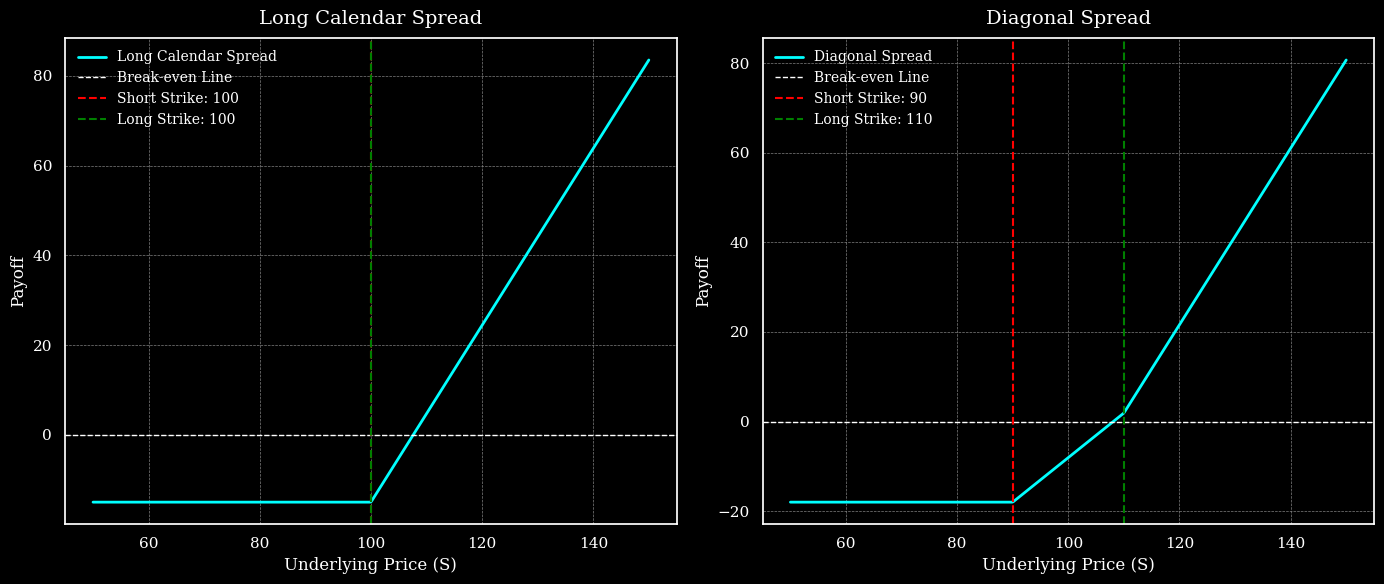

In [107]:
def calculate_option_payoff(S, strike, premium, expiry):
    """
    Calculate the payoff of an option given the strike price, premium, and expiry.
    """
    return -premium + np.maximum(S - strike, 0) * np.exp(-0.05 * expiry)


def calculate_time_spread_payoff(S, strike_short, strike_long, premium_short, premium_long, expiry_short, expiry_long, strategy_type):
    """
    Calculate the payoff of a time (horizontal) spread.

    Parameters:
        S (array): Underlying asset prices.
        strike_short (float): Strike price of the shorter-dated option.
        strike_long (float): Strike price of the longer-dated option.
        premium_short (float): Premium for the shorter-dated option.
        premium_long (float): Premium for the longer-dated option.
        expiry_short (float): Time to expiration for the shorter-dated option.
        expiry_long (float): Time to expiration for the longer-dated option.
        strategy_type (str): One of ['calendar', 'diagonal'].
    Returns:
        np.array: Payoff values for the given spread strategy.
    """
    if strategy_type not in ['calendar', 'diagonal']:
        raise ValueError("Invalid strategy_type. Must be one of ['calendar', 'diagonal']")

    payoff = calculate_option_payoff(S, strike_short, premium_short, expiry_short)  
    payoff += calculate_option_payoff(S, strike_long, premium_long, expiry_long)   
    return payoff


S = np.linspace(50, 150, 500)  


strategies = [
    {
        'name': 'Long Calendar Spread',
        'strike_short': 100, 'strike_long': 100,
        'premium_short': 5, 'premium_long': 10,
        'expiry_short': 0.1, 'expiry_long': 0.5,
        'type': 'calendar'
    },
    {
        'name': 'Diagonal Spread',
        'strike_short': 90, 'strike_long': 110,
        'premium_short': 6, 'premium_long': 12,
        'expiry_short': 0.1, 'expiry_long': 0.5,
        'type': 'diagonal'
    }
]


plt.style.use('dark_background')
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes = axes.flatten()

for i, strategy in enumerate(strategies):
    
    payoff = calculate_time_spread_payoff(
        S,
        strategy['strike_short'],
        strategy['strike_long'],
        strategy['premium_short'],
        strategy['premium_long'],
        strategy['expiry_short'],
        strategy['expiry_long'],
        strategy['type']
    )
    
    
    ax = axes[i]
    ax.plot(S, payoff, label=strategy['name'], color='cyan', linewidth=2)
    ax.axhline(0, color='white', linestyle='--', linewidth=1, label="Break-even Line")
    ax.axvline(strategy['strike_short'], color='red', linestyle='--', label=f"Short Strike: {strategy['strike_short']}")
    ax.axvline(strategy['strike_long'], color='green', linestyle='--', label=f"Long Strike: {strategy['strike_long']}")
    
    
    ax.set_title(strategy['name'], fontsize=14, color='white', pad=10)
    ax.set_xlabel('Underlying Price (S)', fontsize=12, color='white')
    ax.set_ylabel('Payoff', fontsize=12, color='white')
    ax.legend(fontsize=10, loc='best', frameon=False)
    ax.grid(color='gray', linestyle='--', linewidth=0.5)


plt.tight_layout()
plt.show()


## **Ratio Spread Strategies**

### **Call Ratio Spread**
A **call ratio spread** involves:
- **Buying** one call option at a lower strike price.
- **Selling** two call options at a higher strike price.

### **Put Ratio Spread**
A **put ratio spread** involves:
- **Buying** one put option at a higher strike price.
- **Selling** two put options at a lower strike price.

Both strategies aim to exploit limited directional movements while benefiting from the reduced premium cost achieved through the sold options.

#### **Payoff Calculations:**

1. **Call Ratio Spread Payoff**:
   - **Call Bought**:
     $$
     \text{Payoff}_{\text{call buy}} = \max(S - \text{strike}_{\text{buy}}, 0) - \text{premium}_{\text{buy}}
     $$
   - **Calls Sold (x2)**:
     $$
     \text{Payoff}_{\text{call sell}} = -2 \cdot \left( \max(S - \text{strike}_{\text{sell}}, 0) - \text{premium}_{\text{sell}} \right)
     $$
   - **Net Payoff**:
     $$
     \text{Payoff}_{\text{call ratio}} = \text{Payoff}_{\text{call buy}} + \text{Payoff}_{\text{call sell}}
     $$

2. **Put Ratio Spread Payoff**:
   - **Put Bought**:
     $$
     \text{Payoff}_{\text{put buy}} = \max(\text{strike}_{\text{buy put}} - S, 0) - \text{premium}_{\text{buy put}}
     $$
   - **Puts Sold (x2)**:
     $$
     \text{Payoff}_{\text{put sell}} = -2 \cdot \left( \max(\text{strike}_{\text{sell put}} - S, 0) - \text{premium}_{\text{sell put}} \right)
     $$
   - **Net Payoff**:
     $$
     \text{Payoff}_{\text{put ratio}} = \text{Payoff}_{\text{put buy}} + \text{Payoff}_{\text{put sell}}
     $$

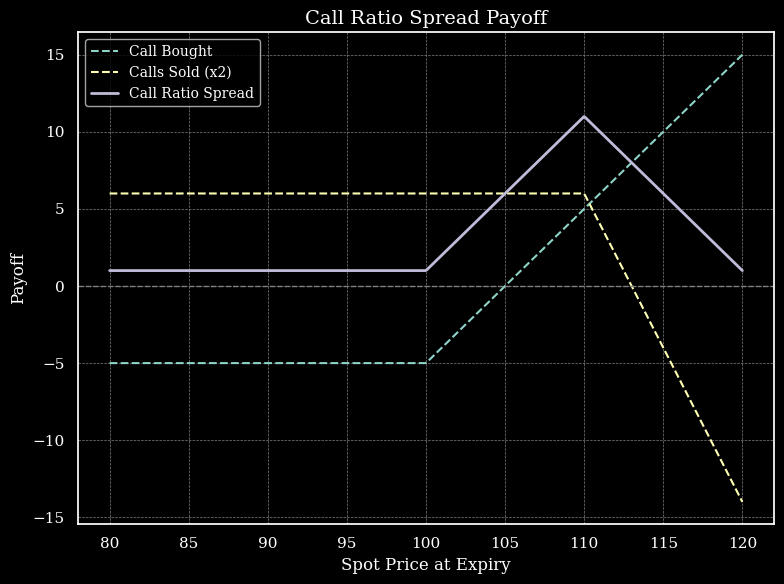

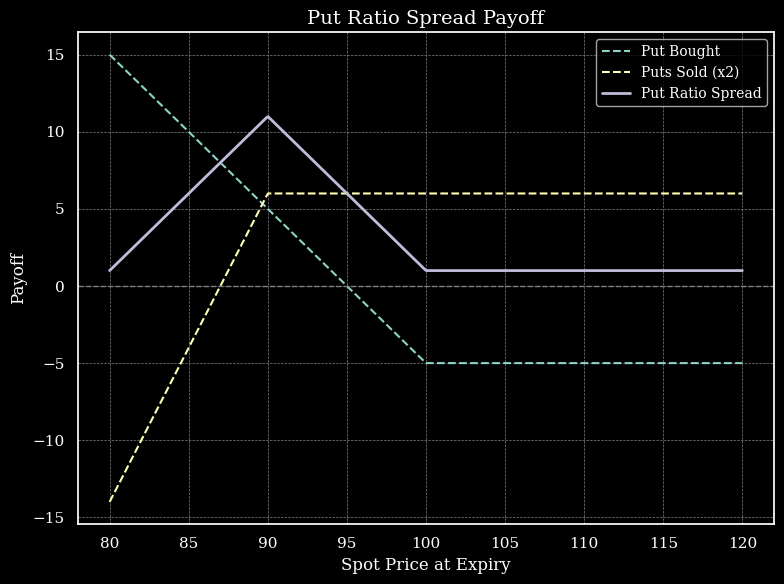

In [108]:
plt.style.use('dark_background')


spot_prices = np.linspace(80, 120, 500)  
strike_buy = 100  
strike_sell = 110  
premium_buy = 5  
premium_sell = 3  


payoff_call_buy = np.maximum(spot_prices - strike_buy, 0) - premium_buy
payoff_call_sell = -2 * (np.maximum(spot_prices - strike_sell, 0) - premium_sell)
payoff_call_ratio = payoff_call_buy + payoff_call_sell


strike_buy_put = 100  
strike_sell_put = 90  
premium_buy_put = 5  
premium_sell_put = 3  


payoff_put_buy = np.maximum(strike_buy_put - spot_prices, 0) - premium_buy_put
payoff_put_sell = -2 * (np.maximum(strike_sell_put - spot_prices, 0) - premium_sell_put)
payoff_put_ratio = payoff_put_buy + payoff_put_sell


plt.figure(figsize=(8, 6))
plt.plot(spot_prices, payoff_call_buy, label="Call Bought", linestyle="--")
plt.plot(spot_prices, payoff_call_sell, label="Calls Sold (x2)", linestyle="--")
plt.plot(spot_prices, payoff_call_ratio, label="Call Ratio Spread", linewidth=2)
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.title("Call Ratio Spread Payoff", fontsize=14)
plt.xlabel("Spot Price at Expiry", fontsize=12)
plt.ylabel("Payoff", fontsize=12)
plt.legend(fontsize=10)
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(spot_prices, payoff_put_buy, label="Put Bought", linestyle="--")
plt.plot(spot_prices, payoff_put_sell, label="Puts Sold (x2)", linestyle="--")
plt.plot(spot_prices, payoff_put_ratio, label="Put Ratio Spread", linewidth=2)
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.title("Put Ratio Spread Payoff", fontsize=14)
plt.xlabel("Spot Price at Expiry", fontsize=12)
plt.ylabel("Payoff", fontsize=12)
plt.legend(fontsize=10)
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


Fetching data for 10Y (IN10Y)



1 Failed download:
['IN10Y']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


No data found for 10Y (IN10Y).
Fetching data for 20Y (IN20Y)



1 Failed download:
['IN20Y']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


No data found for 20Y (IN20Y).
Fetching data for 30Y (IN30Y)



1 Failed download:
['IN30Y']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


No data found for 30Y (IN30Y).


/var/folders/fr/n67zdn_900903cqchbj_j3p00000gn/T/ipykernel_48319/857553741.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


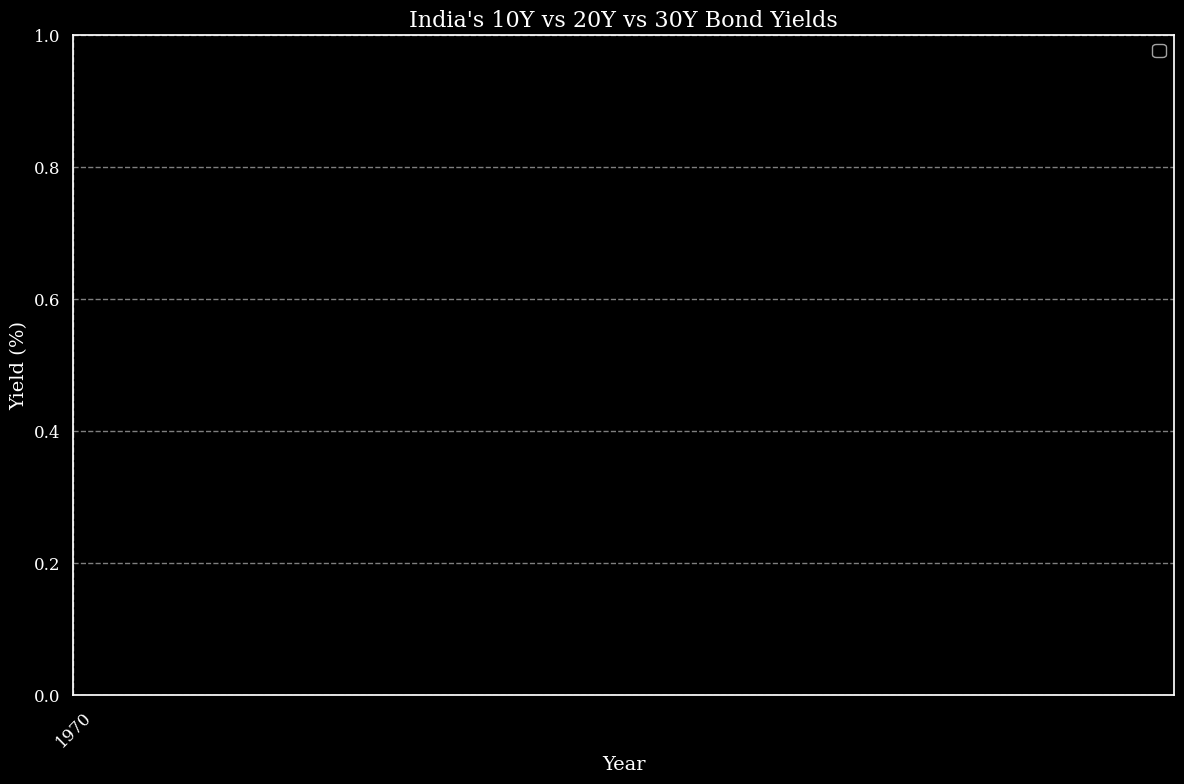

In [113]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define the bond tickers for India's bond yields (replace with correct tickers)
# Note: These are placeholders. Replace them with actual tickers available on Yahoo Finance for India's bond yields.
bond_tickers = {
    "10Y": "IN10Y",  # Placeholder for 10-Year bond yield
    "20Y": "IN20Y",  # Placeholder for 20-Year bond yield
    "30Y": "IN30Y",  # Placeholder for 30-Year bond yield
}

# Fetch data from Yahoo Finance
def fetch_bond_yields(tickers):
    data = {}
    for label, ticker in tickers.items():
        print(f"Fetching data for {label} ({ticker})")
        df = yf.download(ticker, start="1990-01-01", end=None, progress=False)
        if not df.empty:
            data[label] = df["Close"]
        else:
            print(f"No data found for {label} ({ticker}).")
    return data

bond_data = fetch_bond_yields(bond_tickers)

# Combine data into a single DataFrame
import pandas as pd

df = pd.DataFrame(bond_data)

# Plot the data
plt.style.use("dark_background")
plt.figure(figsize=(12, 8))

for label in df.columns:
    plt.plot(df.index, df[label], label=f"{label} Yield")

# Format the plot
plt.title("India's 10Y vs 20Y vs 30Y Bond Yields", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Yield (%)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

# Improve x-axis date formatting
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=5))
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()
